## Задача
Для решения задач используйте датасет, который мы создавали в теме «K-means. Практика»:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [2]:
n_samples = 1500
dataset = make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                     cluster_std=[1.4, 1.7], random_state=42)

In [3]:
X_2, _ = make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Визуализируем наш датасет:

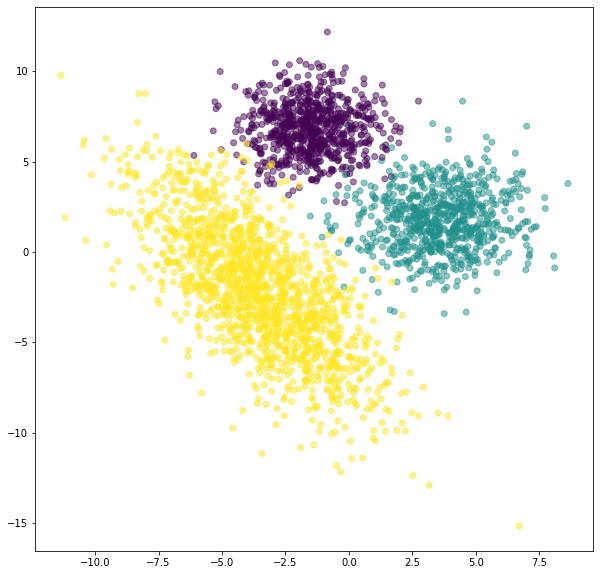

In [4]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Посмотрим распределение классов в датасете:

In [5]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

При использовании переменных X и y считать, что эти переменные содержат признаки объектов и классы объектов датасета соответственно.

In [6]:
ac = AgglomerativeClustering()

В отличие от k-means, AgglomerativeClustering не имеет параметра random_state.

Обучение модели AgglomerativeClustering проходит аналогично обучению модели k-means:

In [7]:
ac.fit(X)

AgglomerativeClustering()

Обучив, мы можем узнать, в какой кластер попал каждый из объектов:

In [8]:
ac.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### Задание
Обучите модель AgglomerativeClustering с параметром n_clusters=3 на признаках исходного датасета. Напишите число листьев в иерархическом дереве, полученном при обучении:

In [9]:
ac = AgglomerativeClustering(n_clusters=3)

In [10]:
ac.fit(X)

AgglomerativeClustering(n_clusters=3)

In [11]:
ac.n_leaves_

3000

### Задание
Подсчитайте количество элементов в каждом из получившихся кластеров. Запишите в форму ниже три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2.

In [13]:
_, counts = np.unique(ac.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

1112 1142 746 

### Задание
При создании модели AgglomerativeClustering можно указать матрицу смежности, передав её в параметр connectivity. Построить матрицу смежности можно с помощью следующего кода:

from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)

connectivity = 0.5 * (connectivity + connectivity.T)

В переменной connectivity будет хранится матрица смежности для ненаправленного графа на основе датасета.

Обучите модель AgglomerativeClustering с параметром n_clusters=3 и составленной матрицей смежности на признаках исходного датасета. Подсчитайте количество элементов в каждом из получившихся кластеров. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2.

Подсказка: При решении данной задачи стандартизация должна быть выключена.

In [14]:
connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [15]:
ac_2 = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)

In [16]:
ac_2.fit(X)

AgglomerativeClustering(connectivity=<3000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 21754 stored elements in Compressed Sparse Row format>,
                        n_clusters=3)

In [17]:
_, counts = np.unique(ac_2.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

1486 746 768 

### Задание
Постройте дендрограмму с помощью пакета scipy:

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [125.0, 125.0, 150.0, 150.0],
  [102.5, 102.5, 137.5, 137.5],
  [80.0, 80.0, 120.0, 120.0],
  [50.0, 50.0, 100.0, 100.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [230.0, 230.0, 252.5, 252.5],
  [210.0, 210.0, 241.25, 241.25],
  [182.5, 182.5, 225.625, 225.625],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [355.0, 355.0, 365.0, 365.0],
  [395.0, 395.0, 405.0, 

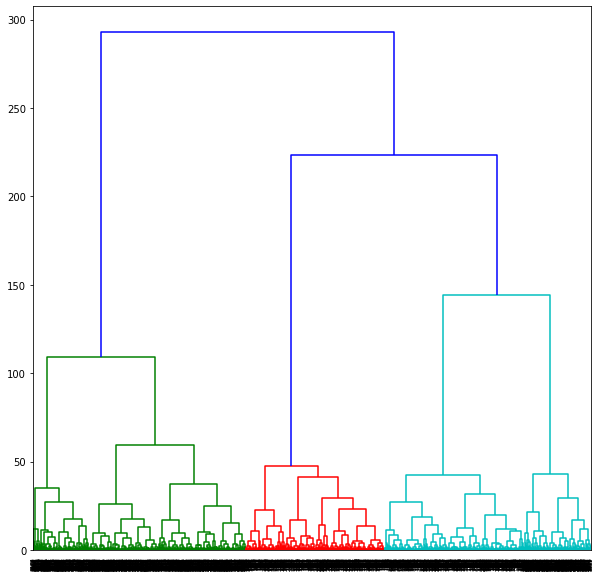

In [22]:
# строим дендрограмму
dendrogram(Z, leaf_rotation=90.)

На выходе должно получиться изображение иерархического дерева.

Постройте дендрограмму на исходном наборе данных. Сколько получится кластеров, если граничным расстоянием для разделения кластеров взять 150.

## Задача
Рассмотрим данные, содержащие информацию о составе различных продуктов.

Попробуем построить на них иерархическую кластеризацию:

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler

In [40]:
df = pd.read_csv('food.csv', sep=' ')

In [41]:
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


In [42]:
X_3 = df.drop(['Name'], axis=1)
X_3 = StandardScaler().fit_transform(X_3)

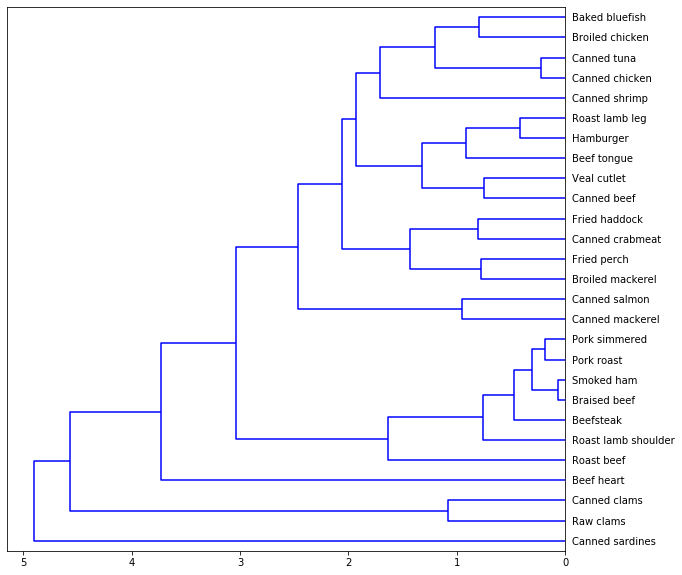

In [43]:
Z = linkage(X_3, method='average', metric='euclidean')
names = df.Name.values
dend = dendrogram(Z, color_threshold=0, labels=names, 
                  orientation='left')

In [44]:
t = 2.3
labels = fcluster(Z, t, criterion='distance')

### Задание
Сколько всего кластеров получилось для продуктов?

In [45]:
print(len(np.unique(labels)))

6


### Задание
Введите номер кластера, в который попали продукты с содержанием кальция от 150 до 160.

In [46]:
ind_calc_150_160 = df[(df.Calcium >= 150) & (df.Calcium <= 160)].index
labels[ind_calc_150_160]

array([3, 3], dtype=int32)

### Задание
Введите номер кластера, в который попал продукт с максимальной жирностью.

In [47]:
ind_max_fat = df.Fat.idxmax()
labels[ind_max_fat]

2